# Повторение NumPy и SciPy, первое знакомство с Matplotlib и sklearn

## Numpy

In [1]:
import numpy as np

In [2]:
x = [2, 3, 4, 6]
y = np.array(x)

In [3]:
print type(x), x
print type(y), y

<type 'list'> [2, 3, 4, 6]
<type 'numpy.ndarray'> [2 3 4 6]


In [4]:
print x[1:3]

[3, 4]


In [5]:
print y[1:3]

[3 4]


In [6]:
print x[[0, 2]]

TypeError: list indices must be integers, not list

In [7]:
print y[[0, 2]]

[2 4]


In [8]:
print y[y>3]

[4 6]


In [9]:
print x * 5

[2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6, 2, 3, 4, 6]


In [10]:
print y * 5

[10 15 20 30]


In [11]:
print x ** 2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [12]:
print y ** 2

[ 4  9 16 36]


In [13]:
matrix = [[1, 2, 4], [3, 1, 0]]
nd_array = np.array(matrix)

In [14]:
print matrix[1][2]

0


In [15]:
print nd_array[1, 2]

0


In [16]:
print np.random.rand()

0.275677202444


In [17]:
print np.random.randn()

0.638260413839


In [18]:
print np.random.randn(4)

[-1.6898943  -0.48791484 -0.92596811 -0.82052263]


In [19]:
print np.random.randn(4, 5)

[[ -1.44133989e-01   1.08348313e+00   6.20929569e-01  -1.60974599e+00
    5.77594663e-01]
 [ -1.22218954e-01  -3.07240825e-02   1.33416633e+00  -4.45190463e-01
    1.47112196e+00]
 [  1.36189602e-01   2.96101337e-01  -1.82746262e+00   7.32590866e-01
    2.34607598e-01]
 [  1.26690978e+00  -5.61826552e-01   1.42968087e-03  -3.01517809e-01
    2.15027649e+00]]


In [20]:
print np.arange(0, 8, 0.1)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9]


In [21]:
print range(0, 8, 0.1)

TypeError: range() integer step argument expected, got float.

In [22]:
%timeit np.arange(0, 10000)
%timeit range(0, 10000)

The slowest run took 14.55 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 18.2 µs per loop
10000 loops, best of 3: 169 µs per loop


## Задание по numpy
1.Напишите свой аналог np.linspace с использованием цикла и с использованием list comprehension. Сравните все три варианта по производительности

In [23]:
def my_linspace(start, stop, num=50):
    if num == 1: return np.array([start])
    elif num == 0: return np.array([])
    
    step = 1. * (stop - start) / (num - 1)
    array = [(start + i * step) for i in range(num - 1)]
    array.append(stop)
    
    return np.array(array)

* *Тесты*

In [24]:
np.array_equal(np.linspace(0, 4, 0), my_linspace(0, 4, 0))

True

In [25]:
np.array_equal(np.linspace(0, 4, 1), my_linspace(0, 4, 1))

True

In [26]:
np.array_equal(np.linspace(0, 4, 2), my_linspace(0, 4, 2))

True

In [27]:
np.array_equal(np.linspace(0, 4, 10), my_linspace(0, 4, 10))

True

In [28]:
np.array_equal(np.linspace(0, 4), my_linspace(0, 4))

True

2.Сравните по производительности основные операции с массивами (array) numpy и с list

In [29]:
a = list(range(10000))
b = np.array(range(10000))

In [30]:
%timeit [i + 5 for i in a]
%timeit b + 5

1000 loops, best of 3: 817 µs per loop
The slowest run took 4.83 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 13.5 µs per loop


In [31]:
%timeit [i * 2 for i in a]
%timeit b * 2

1000 loops, best of 3: 927 µs per loop
100000 loops, best of 3: 17.1 µs per loop


In [32]:
%timeit [i / 2 for i in a]
%timeit b / 2

1000 loops, best of 3: 923 µs per loop
10000 loops, best of 3: 102 µs per loop


In [33]:
%timeit [i ** 2 for i in a]
%timeit b ** 2

1000 loops, best of 3: 1.02 ms per loop
The slowest run took 8.38 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 17.8 µs per loop


In [34]:
%timeit [i + j for i, j in zip(a, a)]
%timeit b + b

1000 loops, best of 3: 1.96 ms per loop
The slowest run took 19.07 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 12.6 µs per loop


In [35]:
%timeit [i * j for i, j in zip(a, a)]
%timeit b * b

100 loops, best of 3: 2.32 ms per loop
The slowest run took 8.67 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 18.1 µs per loop


## SciPy

In [36]:
from scipy import optimize

In [37]:
def f(x):
    return (x[0] - 3.2) ** 2 + (x[1] - 0.1) ** 2 + 3

print f([3.2, 0.1])

3.0


In [38]:
x_min = optimize.minimize(f, [5, 5])
print x_min

      fun: 3.0000000000000058
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ -1.49011612e-07,   5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([ 3.19999993,  0.10000002])


In [39]:
print x_min.x

[ 3.19999993  0.10000002]


In [40]:
from scipy import linalg

In [41]:
a = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

x = linalg.solve(a, b)
print x

[ 2. -2.  9.]


In [42]:
print np.dot(a, x)

[ 2.  4. -1.]


In [43]:
X = np.random.randn(4, 3)
U, D, V = linalg.svd(X)
print U.shape, D.shape, V.shape
print type(U), type(D), type(V)

(4, 4) (3,) (3, 3)
<type 'numpy.ndarray'> <type 'numpy.ndarray'> <type 'numpy.ndarray'>


## Задание по scipy
Попробуйте поменять метод оптимизации в примере решения оптимизационной задачи выше, и подобрать метод с наименьшим количеством вычислений функции. Начальное приближение оставьте тем же.

In [44]:
methods = np.array(['default', 'Nelder-Mead', 'Powell', 'CG', 'BFGS',\
           'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP'])

In [45]:
nfevs = [optimize.minimize(f, [5, 5]).nfev]
for method in methods[1:]:
    nfevs.append(optimize.minimize(f, [5, 5], method=method).nfev)
    
nfevs = np.array(nfevs)

In [46]:
print np.min(nfevs)
print ', '.join(methods[nfevs == np.min(nfevs)])

9
L-BFGS-B, SLSQP


## Matplotlib

In [47]:
%matplotlib inline
from matplotlib import pylab as plt

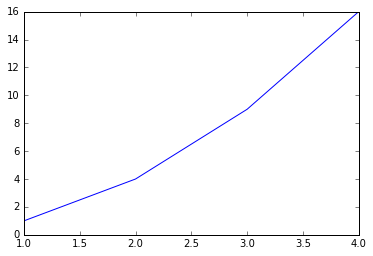

In [48]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

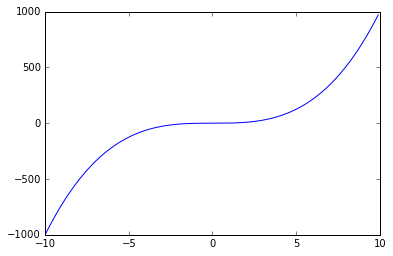

In [49]:
x = np.arange(-10, 10, 0.1)
y = x ** 3
plt.plot(x, y)
plt.show()

## Задание по Matplotlib
1.Добавьте подписи к осям и легенду к примеру выше (см. документацию)

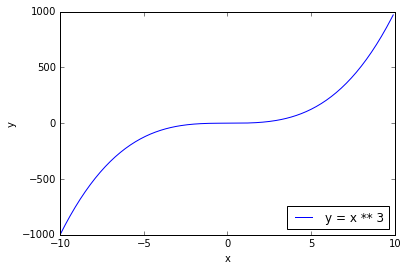

In [50]:
x = np.arange(-10, 10, 0.1)
y = x ** 3

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y, label='y = x ** 3')
plt.legend(loc=4)
plt.show()

2.Постройте график с 5 разными элементарными функциями и сделайте легенду к графику в TeXe

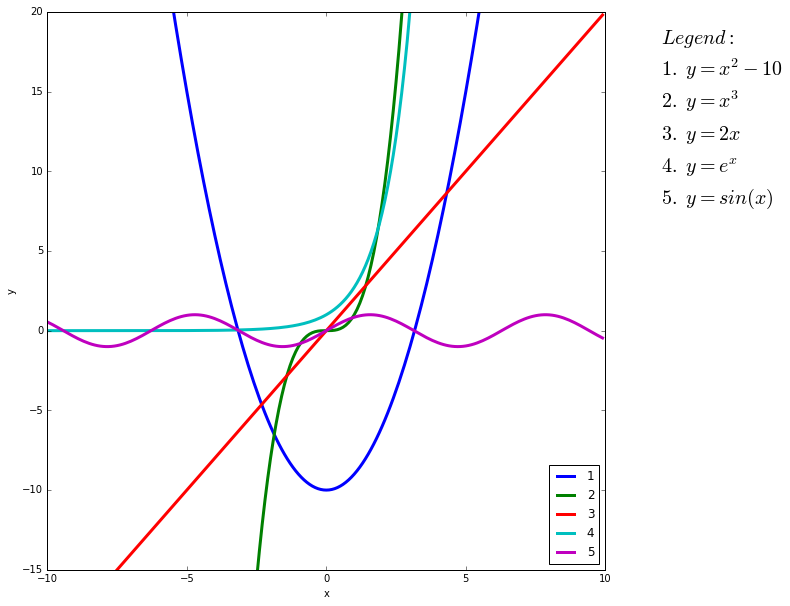

In [51]:
x = np.arange(-10, 10, 0.1)

plt.figure(figsize=(10, 10))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10, 10)
plt.ylim(-15, 20)

plt.text(12, 18, r'$Legend:$', fontsize=20)
plt.text(12, 16, r'$1.\ y = x^2 - 10$', fontsize=20)
plt.text(12, 14, r'$2.\ y = x^3$', fontsize=20)
plt.text(12, 12, r'$3.\ y = 2x$', fontsize=20)
plt.text(12, 10, r'$4.\ y = e^x$', fontsize=20)
plt.text(12, 8, r'$5.\ y = sin(x)$', fontsize=20)

plt.plot(x, x**2 - 10, label='1', linewidth=3)
plt.plot(x, x**3, label='2', linewidth=3)
plt.plot(x, 2 * x, label='3', linewidth=3)
plt.plot(x, np.e**x, label='4', linewidth=3)
plt.plot(x, np.sin(x), label='5', linewidth=3)
plt.legend(loc=4)
plt.show()

3.Сохраните рисунок в файл строчкой кода на Python

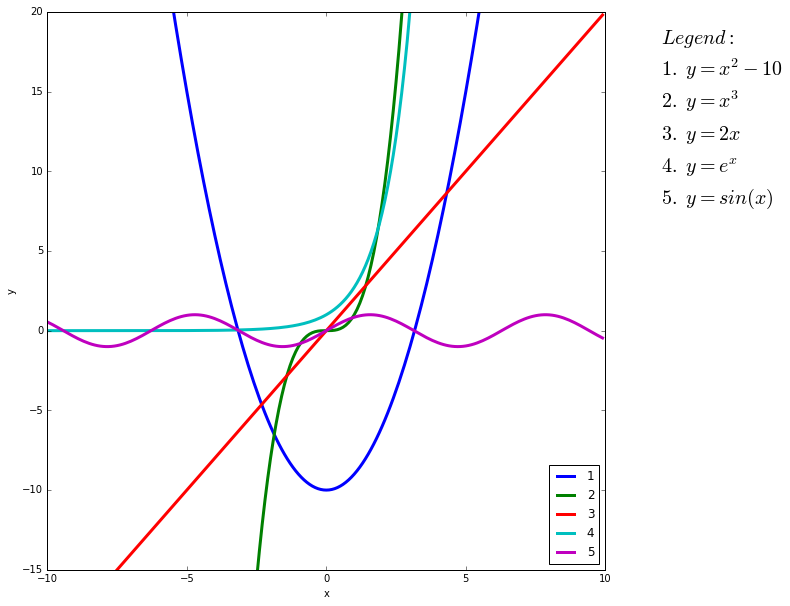

In [52]:
x = np.arange(-10, 10, 0.1)

plt.figure(figsize=(10, 10))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10, 10)
plt.ylim(-15, 20)

plt.text(12, 18, r'$Legend:$', fontsize=20)
plt.text(12, 16, r'$1.\ y = x^2 - 10$', fontsize=20)
plt.text(12, 14, r'$2.\ y = x^3$', fontsize=20)
plt.text(12, 12, r'$3.\ y = 2x$', fontsize=20)
plt.text(12, 10, r'$4.\ y = e^x$', fontsize=20)
plt.text(12, 8, r'$5.\ y = sin(x)$', fontsize=20)

plt.plot(x, x**2 - 10, label='1', linewidth=3)
plt.plot(x, x**3, label='2', linewidth=3)
plt.plot(x, 2 * x, label='3', linewidth=3)
plt.plot(x, np.e**x, label='4', linewidth=3)
plt.plot(x, np.sin(x), label='5', linewidth=3)
plt.legend(loc=4)

plt.savefig('1.png', format='png', dpi=300)
plt.show()

## Все вместе (numpy + scipy + matplotlib)

In [53]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [54]:
np.random.seed(42)

In [55]:
np.random.RandomState(42)

In [56]:
x = np.arange(0, 10, 2)
y = np.exp(-x/3.0) + np.random.randn(len(x)) * 0.05

print x[:5]
print y[:5]

[0 2 4 6 8]
[ 1.02483571  0.5065039   0.29598157  0.21148678  0.05777578]


In [57]:
f = interpolate.interp1d(x, y, kind='quadratic')
xnew = np.arange(0, 8, 0.1)
ynew = f(xnew)

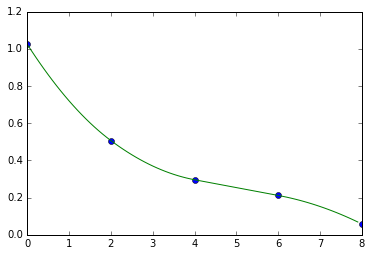

In [58]:
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

## Задание на Numpy+Matplotlib

1.Сгенерируйте массив из 500 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 2x - 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$



In [59]:
def my_function(x):
    return 2 * x - 1

In [60]:
x1 = np.random.uniform(-1, 1, 500)
y1 = my_function(x1) + np.random.normal(0, 0.1, 500)

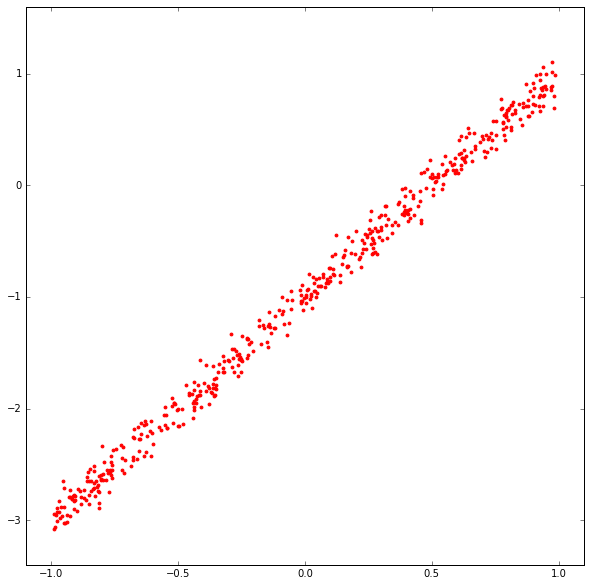

In [61]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)
plt.scatter(x1, y1, color='red', s=8)
plt.show()

2.Сгенерируйте массив из 100 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$

In [62]:
x2 = np.random.uniform(-1, 1, 100)
y2 = np.random.normal(0, 0.1, 100) + 1

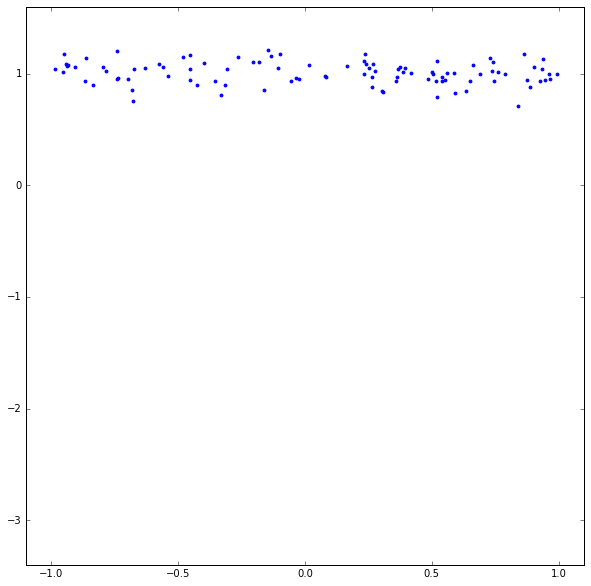

In [63]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)
plt.scatter(x2, y2, color='blue', s=8)
plt.show()

3.Изобразите первый и второй массив точек на плоскости (используя два разных цвета), а также график функии $f(x) = 2x - 1$ (используя какой-нибудь третий цвет)

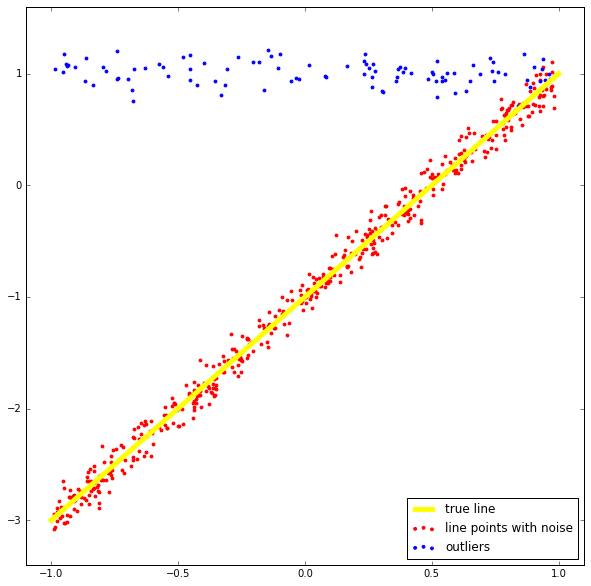

In [64]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)

x = np.array([-1, 1])
plt.plot(x, my_function(x), color='yellow', linewidth=5, label='true line')
plt.scatter(x1, y1, color='red', s=8, label='line points with noise')
plt.scatter(x2, y2, color='blue', s=8, label='outliers')

plt.legend(loc=4)
plt.show()